Cole (2024), "Are there too many traits in our selection indices?"
=
This notebook reads the August 2024 format 38 (bulls) and CTeval files from the Council on Dairy Cattle Breeding and the conformation traits file from Holstein Association USA, computes historical and contemporary selection indices for each animals, and calculates and visualizes correlations among the indices. The input data are read from the pickled file named "PTA/2408/all_traits.pkl" that's created by "Cole Selection Index Data Preparation.ipynb".

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
all_traits = pd.read_pickle('PTA/2408/all_traits.pkl')

In [3]:
# The net merit percentile field in Format 38 can contain strings >:-(
all_traits['net_merit_pct'].replace('--', '0', inplace=True)
all_traits['net_merit_pct'].replace('++', '99', inplace=True)

/var/folders/5p/39yx6v892fs02nscvfx36y2m0000gn/T/ipykernel_17529/3590131209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_traits['net_merit_pct'].replace('--', '0', inplace=True)
/var/folders/5p/39yx6v892fs02nscvfx36y2m0000gn/T/ipykernel_17529/3590131209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [4]:
all_traits_ho = all_traits[all_traits['breed_code_x'] == 'HO'].copy()

In [5]:
pd.set_option('display.max_columns', None)
all_traits_ho.head()

,species_code,breed_eval_x,breed_code_x,country_code_x,id_number_x,sire_breed_code_x,sire_country_code_x,sire_id_number_x,dam_breed_code_x,dam_country_code_x,dam_id_number_x,mgs_breed_code,mgs_country_code,mgs_id_number,dual_breed_code,dual_country_code,dual_id_number,birth_date_x,registry_status,name,short_name_x,date_entered_ai,sampling_status,sampling_controller,current_status,naab_controller,num_naab_sire_codes,naab_code_x,secondary_naab_codes,herd_state_code,herd_county_code,herd_code,most_daus_count,state_most_daus,age_first_calving,pct_daus_first,inbreeding,avg_dau_inbreeding,efi,rel_yld,rel_dpr,pta_milk,rel_mf,pta_fat,pta_fat_pct,rel_prot,pta_prot,pta_prot_pct,rel_pl,pta_pl,rel_scs,pta_scs,rel_nm$,fm$,nm$,cm$,net_merit_pct,pta_dpr,dpr_ib_usability,avg_first_lac_dim_mf,avg_first_lac_dim_prot,avg_pl_age_wgt,pedigree_completeness,pct_mf_rip,pct_prot_rip,num_herds_dpr,num_herds_mf,num_herds_prot,num_herds_pl,num_herds_scs,num_daus_dpr,num_daus_mf,num_daus_prot,num_daus_pl,num_daus_scs,scs_ib_usability,ib_pref_id_code,ib_usability_pl,mf_lac_per_dau,prot_lac_per_dau,heterosis,mf_lac_mgmt_grp,prot_lac_mgmt_grp,predominant_breed_for_xbred,avg_std_dpr,avg_std_milk,avg_std_fat,avg_std_fat_pct,avg_std_milk_prot,avg_std_prot,avg_std_prot_pct,avg_dau_pl,avg_std_scs,num_countries_eval,country_most_daus,dyd_milk,dyd_fat,dyd_fat_pct,dyd_milk_protein,dyd_prot,dyd_prot_pct,dyd_pl,dyd_scs,pct_predominant_breed_for_xbred,pa_milk,rel_pa_mf,pa_fat,rel_pa_prot,pa_prot,rel_pa_pl,pa_pl,rel_pa_scs,pa_scs,pct_us_daus,ib_usability_yield,herdbook,eval_restriction_code,zeroes_future_use,dyd_dpr,pa_dpr,rel_pa_dpr,pa_nm,rel_pa_nm,scr,rel_scr,scr_breedings,breed_code_clone,country_code_clone,id_number_clone,genomic indicator,secondary_naab_codes_contd,pta_hcr,rel_pta_hcr,num_herds_hcr,num_daus_hcr,ib_usability_hcr,pta_ccr,rel_pta_ccr,num_herds_ccr,num_daus_ccr,ib_usability_ccr,pa_hcr,rel_pa_hcr,pa_ccr,rel_pa_ccr,chip_type,genomic_inbreeding,gfi,gm$,pta_liv,rel_pta_liv,num_herds_liv,num_daus_liv,pa_liv,rel_pa_liv,pta_gl,rel_pta_gl,num_herds_gl,num_daus_gl,pa_gl,rel_pa_gl,pta_mfev,rel_pta_mfev,num_herds_mfev,num_daus_mfev,pa_mfev,rel_pa_mfev,pta_dsab,rel_pta_dsab,num_herds_dsab,num_daus_dsab,pa_dsab,rel_pa_dsab,pta_keto,rel_pta_keto,num_herds_keto,num_daus_keto,pa_keto,rel_pa_keto,pta_mast,rel_pta_mast,num_herds_mast,num_daus_mast,pa_mast,rel_pa_mast,pta_metr,rel_pta_metr,num_herds_metr,num_daus_metr,pa_metr,rel_pa_metr,pta_retp,rel_pta_retp,num_herds_retp,num_daus_retp,pa_retp,rel_pa_retp,pta_efc,rel_pta_efc,num_herds_efc,num_daus_efc,pa_efc,rel_pa_efc,pta_hliv,rel_pta_hliv,num_herds_hliv,num_daus_hliv,pa_hliv,rel_pa_hliv,pta_fsav,rel_pta_fsav,num_herds_fsav,num_daus_fsav,pa_fsav,rel_pa_fsav,id17,breed_code_y,country_code_y,id_number_y,rha_status,rha_indicator,registered_name,recessive_codes,sire_breed_code_y,sire_country_code_y,sire_id_number_y,sire_rha_status,sire_rha_indicator,sire_registered_name,sire_recessive_codes,dam_breed_code_y,dam_country_code_y,dam_id_number_y,dam_rha_status,dam_rha_indicator,dam_registered_name,dam_recessive_codes,birth_date_y,naab_code_y,naab_semen_status,ptat_summary_date,sta_ptat,ptat,rel_ptat,num_recs_ptat,num_daus,num_grade_daus,num_herds,num_herd_year_class,eff_daus_herd,avg_daus_final_score,daus_avg_age_adj_score,daus_sd_age_adj_score,daus_num_states_class,daus_num_years_class,linear_proof_ind,linear_date,linear_rel,num_linear_recs,num_linear_daus,num_linear_herds,num_linear_herd_year_class,linear_eff_daus_herd,sta_stature,daus_linear_avg_age_adj_score_stature,daus_linear_sd_age_adj_score_stature,sta_strength,daus_linear_avg_age_adj_score_strength,daus_linear_sd_age_adj_score_strength,sta_body_depth,daus_linear_avg_age_adj_score_body_depth,daus_linear_sd_age_adj_score_body_depth,sta_dairy_form,daus_linear_avg_age_adj_score_dairy_form,daus_linear_sd_age_adj_score_dairy_form,sta_rump_angle,daus_linear_avg_age_adj_score_rump_angle,daus_linear_sd_age_adj_score_rump_angle,sta_thurl_width,daus_linear_avg_age_adj_score_thu

In [6]:
all_traits_ho['PD$'] = ( 0.0745 * all_traits_ho['pta_milk'] ) + ( 1.50 * all_traits_ho['pta_fat'] )

all_traits_ho['MFP$'] = ( 0.016 * all_traits_ho['pta_milk'] ) + ( 1.50 * all_traits_ho['pta_fat'] ) + \
                        ( 1.95 * all_traits_ho['pta_prot'] )

all_traits_ho['CY$'] = ( 0.0021 * all_traits_ho['pta_milk'] ) + ( 1.899 * all_traits_ho['pta_fat'] ) + \
                       ( 1.646 * all_traits_ho['pta_prot'] )

all_traits_ho['NM$1994'] = ( 0.0112 * all_traits_ho['pta_milk'] ) + ( 1.049 * all_traits_ho['pta_fat'] ) + \
                         ( 1.365 * all_traits_ho['pta_prot'] ) + ( 11.67 * all_traits_ho['pta_pl'] ) + \
                         ( -29.13 * (all_traits_ho['pta_scs'] - 3.00) )

all_traits_ho['NM$2000'] = ( 0.018 * all_traits_ho['pta_milk'] ) + ( 2.14 * all_traits_ho['pta_fat'] ) + \
                         ( 4.76 * all_traits_ho['pta_prot'] ) + ( 28.00 * all_traits_ho['pta_pl'] ) + \
                         ( -154.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -14.00 * all_traits_ho['pta_size'] ) + \
                         ( 29.00 * all_traits_ho['pta_udd'] ) + ( 15.00 * all_traits_ho['pta_fl'] )

all_traits_ho['NM$2003'] = ( 2.54 * all_traits_ho['pta_fat'] ) + ( 4.81 * all_traits_ho['pta_prot'] ) + \
                         ( 26.00 * all_traits_ho['pta_pl'] ) + ( -166.00 * (all_traits_ho['pta_scs'] - 3.00) ) + \
                         ( -12.00 * all_traits_ho['pta_size'] ) + ( 33.00 * all_traits_ho['pta_udd'] ) + \
                         ( 15.00 * all_traits_ho['pta_fl'] ) + ( 17.00 * all_traits_ho['pta_dpr'] ) + \
                         ( -5.00 * all_traits_ho['pta_sce'] ) + ( -5.00 * all_traits_ho['pta_dce'] )

all_traits_ho['NM$2006'] = ( 2.70 * all_traits_ho['pta_fat'] ) + ( 3.55 * all_traits_ho['pta_prot'] ) + \
                         ( 29.00 * all_traits_ho['pta_pl'] ) + ( -150.00 * (all_traits_ho['pta_scs'] - 3.00) ) + \
                         ( -14.00 * all_traits_ho['pta_size'] ) + ( 28.00 * all_traits_ho['pta_udd'] ) + \
                         ( 13.00 * all_traits_ho['pta_fl'] ) + ( 21.00 * all_traits_ho['pta_dpr'] ) + \
                         ( -4.00 * all_traits_ho['pta_sce'] ) + ( -3.00 * all_traits_ho['pta_dce'] ) + \
                         ( -4.00 * all_traits_ho['pta_ssb'] ) + ( -8.00 * all_traits_ho['pta_dsb'] )

all_traits_ho['NM$2010'] = ( -0.001 * all_traits_ho['pta_milk'] ) + ( 2.89 * all_traits_ho['pta_fat'] ) + \
                         ( 3.41 * all_traits_ho['pta_prot'] ) + ( 35.00 * all_traits_ho['pta_pl'] ) + \
                         ( -182.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -23.00 * all_traits_ho['pta_size'] ) + \
                         ( 32.00 * all_traits_ho['pta_udd'] ) + ( 15.00 * all_traits_ho['pta_fl'] ) + \
                         ( 27.00 * all_traits_ho['pta_dpr'] ) + ( -4.00 * all_traits_ho['pta_sce'] ) + \
                         ( -3.00 * all_traits_ho['pta_dce'] ) + ( -4.00 * all_traits_ho['pta_ssb'] ) + \
                         ( -8.00 * all_traits_ho['pta_dsb'] )

all_traits_ho['NM$2014'] = ( -0.006 * all_traits_ho['pta_milk'] ) + ( 3.22 * all_traits_ho['pta_fat'] ) + \
                         ( 4.14 * all_traits_ho['pta_prot'] ) + ( 29.00 * all_traits_ho['pta_pl'] ) + \
                         ( -122.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -16.00 * all_traits_ho['pta_size'] ) + \
                         ( 31.00 * all_traits_ho['pta_udd'] ) + ( 10.00 * all_traits_ho['pta_fl'] ) + \
                         ( 11.00 * all_traits_ho['pta_dpr'] ) + ( -4.00 * all_traits_ho['pta_sce'] ) + \
                         ( -3.00 * all_traits_ho['pta_dce'] ) + ( -4.00 * all_traits_ho['pta_ssb'] ) + \
                         ( -8.00 * all_traits_ho['pta_dsb'] ) + ( 2.30 * all_traits_ho['pta_hcr'] ) + \
                         ( 2.20 * all_traits_ho['pta_ccr'] )

all_traits_ho['NM$2017'] = ( -0.004 * all_traits_ho['pta_milk'] ) + ( 3.56 * all_traits_ho['pta_fat'] ) + \
                         ( 3.81 * all_traits_ho['pta_prot'] ) + ( 21.00 * all_traits_ho['pta_pl'] ) + \
                         ( -117.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -20.00 * all_traits_ho['pta_size'] ) + \
                         ( 31.00 * all_traits_ho['pta_udd'] ) + ( 10.00 * all_traits_ho['pta_fl'] ) + \
                         ( 11.00 * all_traits_ho['pta_dpr'] ) + ( -4.00 * all_traits_ho['pta_sce'] ) + \
                         ( -3.00 * all_traits_ho['pta_dce'] ) + ( -4.00 * all_traits_ho['pta_ssb'] ) + \
                         ( -8.00 * all_traits_ho['pta_dsb'] ) + ( 2.20 * all_traits_ho['pta_hcr'] ) + \
                         ( 2.20 * all_traits_ho['pta_ccr'] ) + ( 12.00 * all_traits_ho['pta_liv'] )

all_traits_ho['NM$2018'] = ( -0.004 * all_traits_ho['pta_milk'] ) + ( 4.03 * all_traits_ho['pta_fat'] ) + \
                         ( 3.53 * all_traits_ho['pta_prot'] ) + ( 19.00 * all_traits_ho['pta_pl'] ) + \
                         ( -72.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -18.00 * all_traits_ho['pta_size'] ) + \
                         ( 31.00 * all_traits_ho['pta_udd'] ) + ( 10.00 * all_traits_ho['pta_fl'] ) + \
                         ( 11.00 * all_traits_ho['pta_dpr'] ) + ( -4.00 * all_traits_ho['pta_sce'] ) + \
                         ( -3.00 * all_traits_ho['pta_dce'] ) + ( -4.00 * all_traits_ho['pta_ssb'] ) + \
                         ( -8.00 * all_traits_ho['pta_dsb'] ) + ( 2.40 * all_traits_ho['pta_hcr'] ) + \
                         ( 2.80 * all_traits_ho['pta_ccr'] ) + ( 12.00 * all_traits_ho['pta_liv'] ) + \
                         ( 2.8 * 34 * 0.01 * all_traits_ho['pta_mfev'] ) + ( 2.8 * 197 * 0.01 * all_traits_ho['pta_dsab'] ) + \
                         ( 2.8 * 28 * 0.01 * all_traits_ho['pta_keto'] ) + ( 2.8 * 75 * 0.01 * all_traits_ho['pta_mast'] ) + \
                         ( 2.8 * 112 * 0.01 * all_traits_ho['pta_metr'] ) + ( 2.8 * 68 * 0.01 * all_traits_ho['pta_retp'] ) 

all_traits_ho['NM$2021'] = ( 0.002 * all_traits_ho['pta_milk'] ) + ( 4.18 * all_traits_ho['pta_fat'] ) + \
                         ( 4.67 * all_traits_ho['pta_prot'] ) + ( 34.00 * all_traits_ho['pta_pl'] ) + \
                         ( -74.00 * (all_traits_ho['pta_scs'] - 3.00) ) + ( -45.00 * all_traits_ho['pta_size'] ) + \
                         ( 19.00 * all_traits_ho['pta_udd'] ) + ( 3.00 * all_traits_ho['pta_fl'] ) + \
                         ( 11.00 * all_traits_ho['pta_dpr'] ) + ( -4.00 * all_traits_ho['pta_sce'] ) + \
                         ( -3.00 * all_traits_ho['pta_dce'] ) + ( -4.00 * all_traits_ho['pta_ssb'] ) + \
                         ( -8.00 * all_traits_ho['pta_dsb'] ) + ( 1.10 * all_traits_ho['pta_hcr'] ) + \
                         ( 2.20 * all_traits_ho['pta_ccr'] ) + ( 9.80 * all_traits_ho['pta_liv'] ) + \
                         ( 2.8 * 34 * 0.01 * all_traits_ho['pta_mfev'] ) + ( 2.8 * 197 * 0.01 * all_traits_ho['pta_dsab'] ) + \
                         ( 2.8 * 28 * 0.01 * all_traits_ho['pta_keto'] ) + ( 2.8 * 75 * 0.01 * all_traits_ho['pta_mast'] ) + \
                         ( 2.8 * 112 * 0.01 * all_traits_ho['pta_metr'] ) + ( 2.8 * 68 * 0.01 * all_traits_ho['pta_retp'] + \
                         ( -0.3 * all_traits_ho['pta_rfi'] ) + ( 2.1 * all_traits_ho['pta_efc'] ) + ( 5.0 * all_traits_ho['pta_hliv'] ) ) 

In [7]:
all_traits_ho['birth_date'] = pd.to_datetime(all_traits_ho['birth_date_x'], format='%Y%m%d')
all_traits_ho['date_entered_ai'] = pd.to_datetime(all_traits_ho['date_entered_ai'], format='%Y%m')

In [8]:
all_traits_ho['birth_year'] = all_traits_ho['birth_date'].dt.year
all_traits_ho['ai_year'] = all_traits_ho['date_entered_ai'].dt.year

In [9]:
all_traits_ho[['id17', 'name', 'birth_date', 'date_entered_ai', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'nm$']].head()

,id17,name,birth_date,date_entered_ai,PD$,MFP$,CY$,NM$1994,NM$2000,nm$
0,HO840003000247244,LOUMAR AIRRAID HAWKEYE-ET,2007-10-26,2009-02-01,-92.8580,-97.694,-83.7724,-110.0831,-327.262,-468
1,HO840003000336265,END-ROAD MANGO BARDIA-ET,2006-08-22,2008-01-01,-52.5835,-57.478,-58.5793,-39.3415,-85.694,-76
2,HO840003000336289,END-ROAD MANGO MAIMUN,2006-09-29,2008-01-01,-52.2210,-41.028,-45.6118,-45.3287,-136.174,-145
3,HO840003000336293,END-ROAD BUCKEYE MAIK-ET,2006-11-01,2008-02-01,-22.7835,-37.428,-46.2173,-18.5958,-41.014,-20
4,HO840003000336295,END-ROAD ZENITH BEDROS,2006-11-05,2007-12-01,-149.2845,-119.196,-95.8711,-72.0483,-200.298,-159


In [10]:
all_traits_ho['birth_date'].max()

Timestamp('2024-05-28 00:00:00')

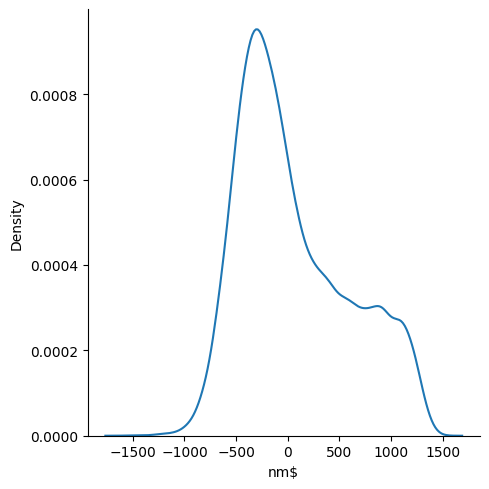

In [11]:
sns.displot(data=all_traits_ho, x="nm$", kind="kde")

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
all_traits_ho.describe()

,species_code,birth_date_x,date_entered_ai,sampling_controller,naab_controller,num_naab_sire_codes,herd_state_code,herd_county_code,herd_code,most_daus_count,state_most_daus,age_first_calving,pct_daus_first,inbreeding,avg_dau_inbreeding,efi,rel_yld,rel_dpr,pta_milk,rel_mf,pta_fat,pta_fat_pct,rel_prot,pta_prot,pta_prot_pct,rel_pl,pta_pl,rel_scs,pta_scs,rel_nm$,fm$,nm$,cm$,pta_dpr,dpr_ib_usability,avg_first_lac_dim_mf,avg_first_lac_dim_prot,avg_pl_age_wgt,pedigree_completeness,pct_mf_rip,pct_prot_rip,num_herds_dpr,num_herds_mf,num_herds_prot,num_herds_pl,num_herds_scs,num_daus_dpr,num_daus_mf,num_daus_prot,num_daus_pl,num_daus_scs,scs_ib_usability,ib_pref_id_code,ib_usability_pl,mf_lac_per_dau,prot_lac_per_dau,heterosis,mf_lac_mgmt_grp,prot_lac_mgmt_grp,avg_std_dpr,avg_std_milk,avg_std_fat,avg_std_fat_pct,avg_std_milk_prot,avg_std_prot,avg_std_prot_pct,avg_dau_pl,avg_std_scs,num_countries_eval,dyd_milk,dyd_fat,dyd_fat_pct,dyd_milk_protein,dyd_prot,dyd_prot_pct,dyd_pl,dyd_scs,pct_predominant_breed_for_xbred,pa_milk,rel_pa_mf,pa_fat,rel_pa_prot,pa_prot,rel_pa_pl,pa_pl,rel_pa_scs,pa_scs,pct_us_daus,ib_usability_yield,eval_restriction_code,zeroes_future_use,dyd_dpr,pa_dpr,rel_pa_dpr,pa_nm,rel_pa_nm,scr,rel_scr,scr_breedings,genomic indicator,pta_hcr,rel_pta_hcr,num_herds_hcr,num_daus_hcr,ib_usability_hcr,pta_ccr,rel_pta_ccr,num_herds_ccr,num_daus_ccr,ib_usability_ccr,pa_hcr,rel_pa_hcr,pa_ccr,rel_pa_ccr,chip_type,genomic_inbreeding,gfi,gm$,pta_liv,rel_pta_liv,num_herds_liv,num_daus_liv,pa_liv,rel_pa_liv,pta_gl,rel_pta_gl,num_herds_gl,num_daus_gl,pa_gl,rel_pa_gl,pta_mfev,rel_pta_mfev,num_herds_mfev,num_daus_mfev,pa_mfev,rel_pa_mfev,pta_dsab,rel_pta_dsab,num_herds_dsab,num_daus_dsab,pa_dsab,rel_pa_dsab,pta_keto,rel_pta_keto,num_herds_keto,num_daus_keto,pa_keto,rel_pa_keto,pta_mast,rel_pta_mast,num_herds_mast,num_daus_mast,pa_mast,rel_pa_mast,pta_metr,rel_pta_metr,num_herds_metr,num_daus_metr,pa_metr,rel_pa_metr,pta_retp,rel_pta_retp,num_herds_retp,num_daus_retp,pa_retp,rel_pa_retp,pta_efc,rel_pta_efc,num_herds_efc,num_daus_efc,pa_efc,rel_pa_efc,pta_hliv,rel_pta_hliv,num_herds_hliv,num_daus_hliv,pa_hliv,rel_pa_hliv,pta_fsav,rel_pta_fsav,num_herds_fsav,num_daus_fsav,pa_fsav,rel_pa_fsav,rha_status,sire_rha_status,dam_rha_status,birth_date_y,ptat_summary_date,sta_ptat,ptat,rel_ptat,num_recs_ptat,num_daus,num_grade_daus,num_herds,num_herd_year_class,eff_daus_herd,avg_daus_final_score,daus_avg_age_adj_score,daus_sd_age_adj_score,daus_num_states_class,daus_num_years_class,linear_proof_ind,linear_date,linear_rel,num_linear_recs,num_linear_daus,num_linear_herds,num_linear_herd_year_class,linear_eff_daus_herd,sta_stature,daus_linear_avg_age_adj_score_stature,daus_linear_sd_age_adj_score_stature,sta_strength,daus_linear_avg_age_adj_score_strength,daus_linear_sd_age_adj_score_strength,sta_body_depth,daus_linear_avg_age_adj_score_body_depth,daus_linear_sd_age_adj_score_body_depth,sta_dairy_form,daus_linear_avg_age_adj_score_dairy_form,daus_linear_sd_age_adj_score_dairy_form,sta_rump_angle,daus_linear_avg_age_adj_score_rump_angle,daus_linear_sd_age_adj_score_rump_angle,sta_thurl_width,daus_linear_avg_age_adj_score_thurl_width,daus_linear_sd_age_adj_score_thurl_width,sta_rear_legs_side,daus_linear_avg_age_adj_score_rear_legs_side,daus_linear_sd_age_adj_score_rear_legs_side,sta_rear_legs_rear,daus_linear_avg_age_adj_score_rear_legs_rear,daus_linear_sd_age_adj_score_rear_legs_rear,sta_foot_angle,daus_linear_avg_age_adj_score_foot_angle,daus_linear_sd_age_adj_score_foot_angle,sta_feet_legs_score,daus_linear_avg_age_adj_score_feet_legs_score,daus_linear_sd_age_adj_score_feet_legs_score,sta_fore_udder_attachment,daus_linear_avg_age_adj_score_fore_udder_attachment,daus_linear_sd_age_adj_score_fore_udder_attachment,sta_rear_udder_height,daus_linear_avg_age_adj_score_rear_udder_height,daus_linear_sd_age_adj_score_rear_udder_height,sta_rear_udder_width,daus_linear_avg_age_adj_score_rear_udder_width,daus_linear_sd_age_adj_score_rear_udder_width,sta_udder_cleft

I also want to do some calculations with the reliabilities of each index, which is going to take a little more work. Per the Net Merit documentation:

"The REL of NM\\$ is computed using matrix algebra from REL of the 14 traits and genetic correlations among those traits. The NM\\$ REL is the variance of predicted NM\\$ divided by the variance of true NM\\$:

$$REL(NM\$) = r′Gr/v′Gv$$

where **r** contains the relative economic values multiplied by the square root of REL for each PTA trait, **G** contains the genetic correlations among the 14 PTA traits, and **v** contains the relative economic values for the traits." (https://aipl.arsusda.gov/reference/nmcalc-2018.htm)

In [14]:
def pd1971_rels(rel_yld, rel_fat):
    pd1971_v = np.array([ [0.52], [0.48] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_pd1971 = genCORR[0:2, 0:2]
    rels = pd1971_v * np.sqrt( np.array([ [rel_yld], [rel_fat] ]) )
    rel_PD = np.linalg.multi_dot([rels.T, G_pd1971, rels]) / \
        np.linalg.multi_dot([pd1971_v.T, G_pd1971, pd1971_v])
    return rel_PD.item(0)

In [15]:
all_traits_ho['rel_PD$'] = pd.Series([
    pd1971_rels(rel_yld, rel_fat) for (rel_yld, rel_fat) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'])
])

In [16]:
def mfp1976_rels(rel_yld, rel_fat, rel_prot):
    mfp1976_v = np.array([ [0.27], [0.46], [0.27] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_mfp1976 = genCORR[0:3, 0:3]
    rels = mfp1976_v * np.sqrt( np.array([ [rel_yld], [rel_fat], [rel_prot] ]) )
    rel_MFP = np.linalg.multi_dot([rels.T, G_mfp1976, rels]) / \
        np.linalg.multi_dot([mfp1976_v.T, G_mfp1976, mfp1976_v])
    return rel_MFP.item(0)

In [17]:
all_traits_ho['rel_MFP$'] = pd.Series([
    mfp1976_rels(rel_yld, rel_fat, rel_prot) for (rel_yld, rel_fat, rel_prot) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'], )
])

In [18]:
def cy1984_rels(rel_yld, rel_fat, rel_prot):
    cy1984_v = np.array([ [0.02], [0.45], [0.53] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_cy1984 = genCORR[0:3, 0:3]
    rels = cy1984_v * np.sqrt( np.array([ [rel_yld], [rel_fat], [rel_prot] ]) )
    rel_CY = np.linalg.multi_dot([rels.T, G_cy1984, rels]) / \
        np.linalg.multi_dot([cy1984_v.T, G_cy1984, cy1984_v])
    return rel_CY.item(0)

In [19]:
all_traits_ho['rel_CY$'] = pd.Series([
    cy1984_rels(rel_yld, rel_fat, rel_prot) for (rel_yld, rel_fat, rel_prot) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'], )
])

In [20]:
def nm1994_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs):
    nm1994_v = np.array([ [0.06], [0.25], [0.43], [0.20], [0.06] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm1994 = genCORR[0:5, 0:5]
    rels = nm1994_v * np.sqrt( np.array([ [rel_yld], [rel_fat], [rel_prot], [rel_pl], [rel_scs] ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm1994, rels]) / \
        np.linalg.multi_dot([nm1994_v.T, G_nm1994, nm1994_v])
    return rel_NM.item(0)

In [21]:
all_traits_ho['rel_NM$1994'] = pd.Series([
    nm1994_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs) for (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'])
])

In [22]:
def nm2000_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl):
    nm2000_v = np.array([ [0.05], [0.21], [0.36], [0.14], [0.09], [0.04], [0.07], [0.04] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2000 = genCORR[0:8, 0:8]
    rels = nm2000_v * np.sqrt( np.array([ [rel_yld], [rel_fat], [rel_prot], [rel_pl], [rel_scs],
                                          [rel_size], [rel_udd], [rel_fl] ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2000, rels]) / \
        np.linalg.multi_dot([nm2000_v.T, G_nm2000, nm2000_v])
    return rel_NM.item(0)

In [23]:
all_traits_ho['rel_NM$2000'] = pd.Series([
    nm2000_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl) for \
        (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'])
])

In [24]:
def nm2006_rels(rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
               rel_sce, rel_dce, rel_ssb, rel_dsb):
    nm2006_v = np.array([ [0.23], [0.23], [0.17], [0.09], [0.06], [0.03], [0.04], [0.09],
                          [0.06] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2006 = genCORR[1:10, 1:10]
    rels = nm2006_v * np.sqrt( np.array([ 
                            [rel_fat],
                            [rel_prot],
                            [rel_pl],
                            [rel_scs],
                            [rel_size],
                            [rel_udd],
                            [rel_fl],
                            [rel_dpr],
                            [ (4./19.) * rel_sce +
                              (3./19.) * rel_dce +
                              (4./19.) * rel_ssb +
                              (8./19.) * rel_dsb ]
                        ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2006, rels]) / \
        np.linalg.multi_dot([nm2006_v.T, G_nm2006, nm2006_v])
    return rel_NM.item(0)

In [25]:
all_traits_ho['rel_NM$2006'] = pd.Series([
    nm2006_rels(rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb) for \
            (rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_prot'], all_traits_ho['rel_pl'],
               all_traits_ho['rel_scs'], all_traits_ho['linear_rel'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'], all_traits_ho['rel_sce'],
               all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'], all_traits_ho['rel_dsb'])
])

In [26]:
def nm2010_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
               rel_sce, rel_dce, rel_ssb, rel_dsb):
    nm2010_v = np.array([ [0.00], [0.19], [0.16], [0.22], [0.10], [0.06], [0.07], [0.04],
                          [0.11], [0.05] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2010 = genCORR[0:10, 0:10]
    rels = nm2010_v * np.sqrt( np.array([ 
                            [rel_yld],
                            [rel_fat],
                            [rel_prot],
                            [rel_pl],
                            [rel_scs],
                            [rel_size],
                            [rel_udd],
                            [rel_fl],
                            [rel_dpr],
                            [ (4./19.) * rel_sce +
                              (3./19.) * rel_dce +
                              (4./19.) * rel_ssb +
                              (8./19.) * rel_dsb ]
                        ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2010, rels]) / \
        np.linalg.multi_dot([nm2010_v.T, G_nm2010, nm2010_v])
    return rel_NM.item(0)

In [27]:
all_traits_ho['rel_NM$2010'] = pd.Series([
    nm2010_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb) for \
            (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'],
               all_traits_ho['rel_sce'], all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'],
               all_traits_ho['rel_dsb'])
])

In [28]:
def nm2014_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
               rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr):
    nm2014_v = np.array([ [0.01], [0.22], [0.20], [0.19], [0.07], [0.05], [0.08], [0.03], [0.07],
                          [0.05], [0.02], [0.01] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2014 = genCORR[0:12, 0:12]
    rels = nm2014_v * np.sqrt( np.array([ 
                        [rel_yld],
                        [rel_fat],
                        [rel_prot],
                        [rel_pl],
                        [rel_scs],
                        [rel_size],
                        [rel_udd],
                        [rel_fl],
                        [rel_dpr],
                        [ (4./19.) * rel_sce +
                          (3./19.) * rel_dce +
                          (4./19.) * rel_ssb +
                          (8./19.) * rel_dsb ],
                        [rel_hcr],
                        [rel_ccr],
                    ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2014, rels]) / \
        np.linalg.multi_dot([nm2014_v.T, G_nm2014, nm2014_v])
    return rel_NM.item(0)

In [29]:
all_traits_ho['rel_NM$2014'] = pd.Series([
    nm2014_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr) for \
            (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'],
               all_traits_ho['rel_sce'], all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'],
               all_traits_ho['rel_dsb'], all_traits_ho['rel_pta_hcr'], all_traits_ho['rel_pta_ccr'])
])

In [30]:
def nm2017_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
               rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv):
    nm2017_v = np.array([ [0.07], [0.237], [0.183], [0.134], [0.065], [0.059],
                          [0.074], [0.027], [0.067], [0.048], [0.014], [0.016],
                          [0.074] ])
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2017 = genCORR[0:13, 0:13]
    rels = nm2017_v * np.sqrt( np.array([ 
                            [rel_yld],
                            [rel_fat],
                            [rel_prot],
                            [rel_pl],
                            [rel_scs],
                            [rel_size],
                            [rel_udd],
                            [rel_fl],
                            [rel_dpr],
                            [ (4./19.) * rel_sce +
                              (3./19.) * rel_dce +
                              (4./19.) * rel_ssb +
                              (8./19.) * rel_dsb ],
                            [rel_hcr],
                            [rel_ccr],
                            [rel_liv],
                        ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2017, rels]) / \
        np.linalg.multi_dot([nm2017_v.T, G_nm2017, nm2017_v])
    return rel_NM.item(0)

In [31]:
all_traits_ho['rel_NM$2017'] = pd.Series([
    nm2017_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv) for \
            (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'],
               all_traits_ho['rel_sce'], all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'],
               all_traits_ho['rel_dsb'], all_traits_ho['rel_pta_hcr'], all_traits_ho['rel_pta_ccr'],
               all_traits_ho['rel_pta_liv'])
])

In [32]:
def nm2018_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
                rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev,
                rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp):
    nm2018_v = np.array([ [0.007], [0.268], [0.169], [0.121], [0.040], [0.053],
                          [0.074], [0.027], [0.067], [0.048], [0.014], [0.016],
                          [0.073], [0.023] ])
    #print(nm2018_v.sum())
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2018 = genCORR[0:14, 0:14]
    rels = nm2018_v * np.sqrt( np.array([ 
                            [rel_yld],
                            [rel_fat],
                            [rel_prot],
                            [rel_pl],
                            [rel_scs],
                            [rel_size],
                            [rel_udd],
                            [rel_fl],
                            [rel_dpr],
                            [ (4./19.) * rel_sce +
                              (3./19.) * rel_dce +
                              (4./19.) * rel_ssb +
                              (8./19.) * rel_dsb ],
                            [rel_hcr],
                            [rel_ccr],
                            [rel_liv],
                            [ (34./514.) * rel_pta_mfev +
                              (197./514.) * rel_pta_dsab +
                              (28./514.) * rel_pta_keto +
                              (75./514.) * rel_pta_mast +
                              (112./514.) * rel_pta_metr +                             
                              (68./514.) * rel_pta_retp ],
                        ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2018, rels]) / \
        np.linalg.multi_dot([nm2018_v.T, G_nm2018, nm2018_v])
    return rel_NM.item(0)

In [33]:
all_traits_ho['rel_NM$2018'] = pd.Series([
    nm2018_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev, \
            rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp) for \
            (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev,
            rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'],
               all_traits_ho['rel_sce'], all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'],
               all_traits_ho['rel_dsb'], all_traits_ho['rel_pta_hcr'], all_traits_ho['rel_pta_ccr'],
               all_traits_ho['rel_pta_liv'], all_traits_ho['rel_pta_mfev'], all_traits_ho['rel_pta_dsab'],
               all_traits_ho['rel_pta_keto'], all_traits_ho['rel_pta_mast'], all_traits_ho['rel_pta_metr'],
               all_traits_ho['rel_pta_retp'])
])

In [34]:
def nm2021_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr,
                rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev,
                rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp, rel_pta_rfi,
                rel_pta_efc, rel_pta_hliv):
    nm2021_v = np.array([ [0.003], [0.218], [0.170], [0.151], [0.029], [0.094],
                          [0.031], [0.005], [0.050], [0.028], [0.005], [0.012],
                          [0.043], [0.017], [0.124], [0.011], [0.008] ])
    #print(nm2018_v.sum())
    genCORR = np.load('genetic_correlation_matrix.npy')
    G_nm2021 = genCORR
    rels = nm2021_v * np.sqrt( np.array([ 
                            [rel_yld],
                            [rel_fat],
                            [rel_prot],
                            [rel_pl],
                            [rel_scs],
                            [rel_size],
                            [rel_udd],
                            [rel_fl],
                            [rel_dpr],
                            [ (4./19.) * rel_sce +
                              (3./19.) * rel_dce +
                              (4./19.) * rel_ssb +
                              (8./19.) * rel_dsb ],
                            [rel_hcr],
                            [rel_ccr],
                            [rel_liv],
                            [ (34./514.) * rel_pta_mfev +
                              (197./514.) * rel_pta_dsab +
                              (28./514.) * rel_pta_keto +
                              (75./514.) * rel_pta_mast +
                              (112./514.) * rel_pta_metr +                             
                              (68./514.) * rel_pta_retp ],
                            [0.0],
                            [rel_pta_efc],
                            [rel_pta_hliv],
                        ]) )
    rel_NM = np.linalg.multi_dot([rels.T, G_nm2021, rels]) / \
        np.linalg.multi_dot([nm2021_v.T, G_nm2021, nm2021_v])
    return rel_NM.item(0)

In [35]:
all_traits_ho['rel_NM$2021'] = pd.Series([
    nm2021_rels(rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev, \
            rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp, rel_pta_rfi,
            rel_pta_efc, rel_pta_hliv) for \
            (rel_yld, rel_fat, rel_prot, rel_pl, rel_scs, rel_size, rel_udd, rel_fl, rel_dpr, \
            rel_sce, rel_dce, rel_ssb, rel_dsb, rel_hcr, rel_ccr, rel_liv, rel_pta_mfev,
            rel_pta_dsab, rel_pta_keto, rel_pta_mast, rel_pta_metr, rel_pta_retp, rel_pta_rfi,
            rel_pta_efc, rel_pta_hliv) \
        in zip(all_traits_ho['rel_mf'], all_traits_ho['rel_mf'], all_traits_ho['rel_prot'],
               all_traits_ho['rel_pl'], all_traits_ho['rel_scs'], all_traits_ho['linear_rel'],
               all_traits_ho['linear_rel'], all_traits_ho['linear_rel'], all_traits_ho['rel_dpr'],
               all_traits_ho['rel_sce'], all_traits_ho['rel_dce'], all_traits_ho['rel_ssb'],
               all_traits_ho['rel_dsb'], all_traits_ho['rel_pta_hcr'], all_traits_ho['rel_pta_ccr'],
               all_traits_ho['rel_pta_liv'], all_traits_ho['rel_pta_mfev'], all_traits_ho['rel_pta_dsab'],
               all_traits_ho['rel_pta_keto'], all_traits_ho['rel_pta_mast'], all_traits_ho['rel_pta_metr'],
               all_traits_ho['rel_pta_retp'], all_traits_ho['rel_pta_rfi'], all_traits_ho['rel_pta_efc'],
               all_traits_ho['rel_pta_hliv'])
])

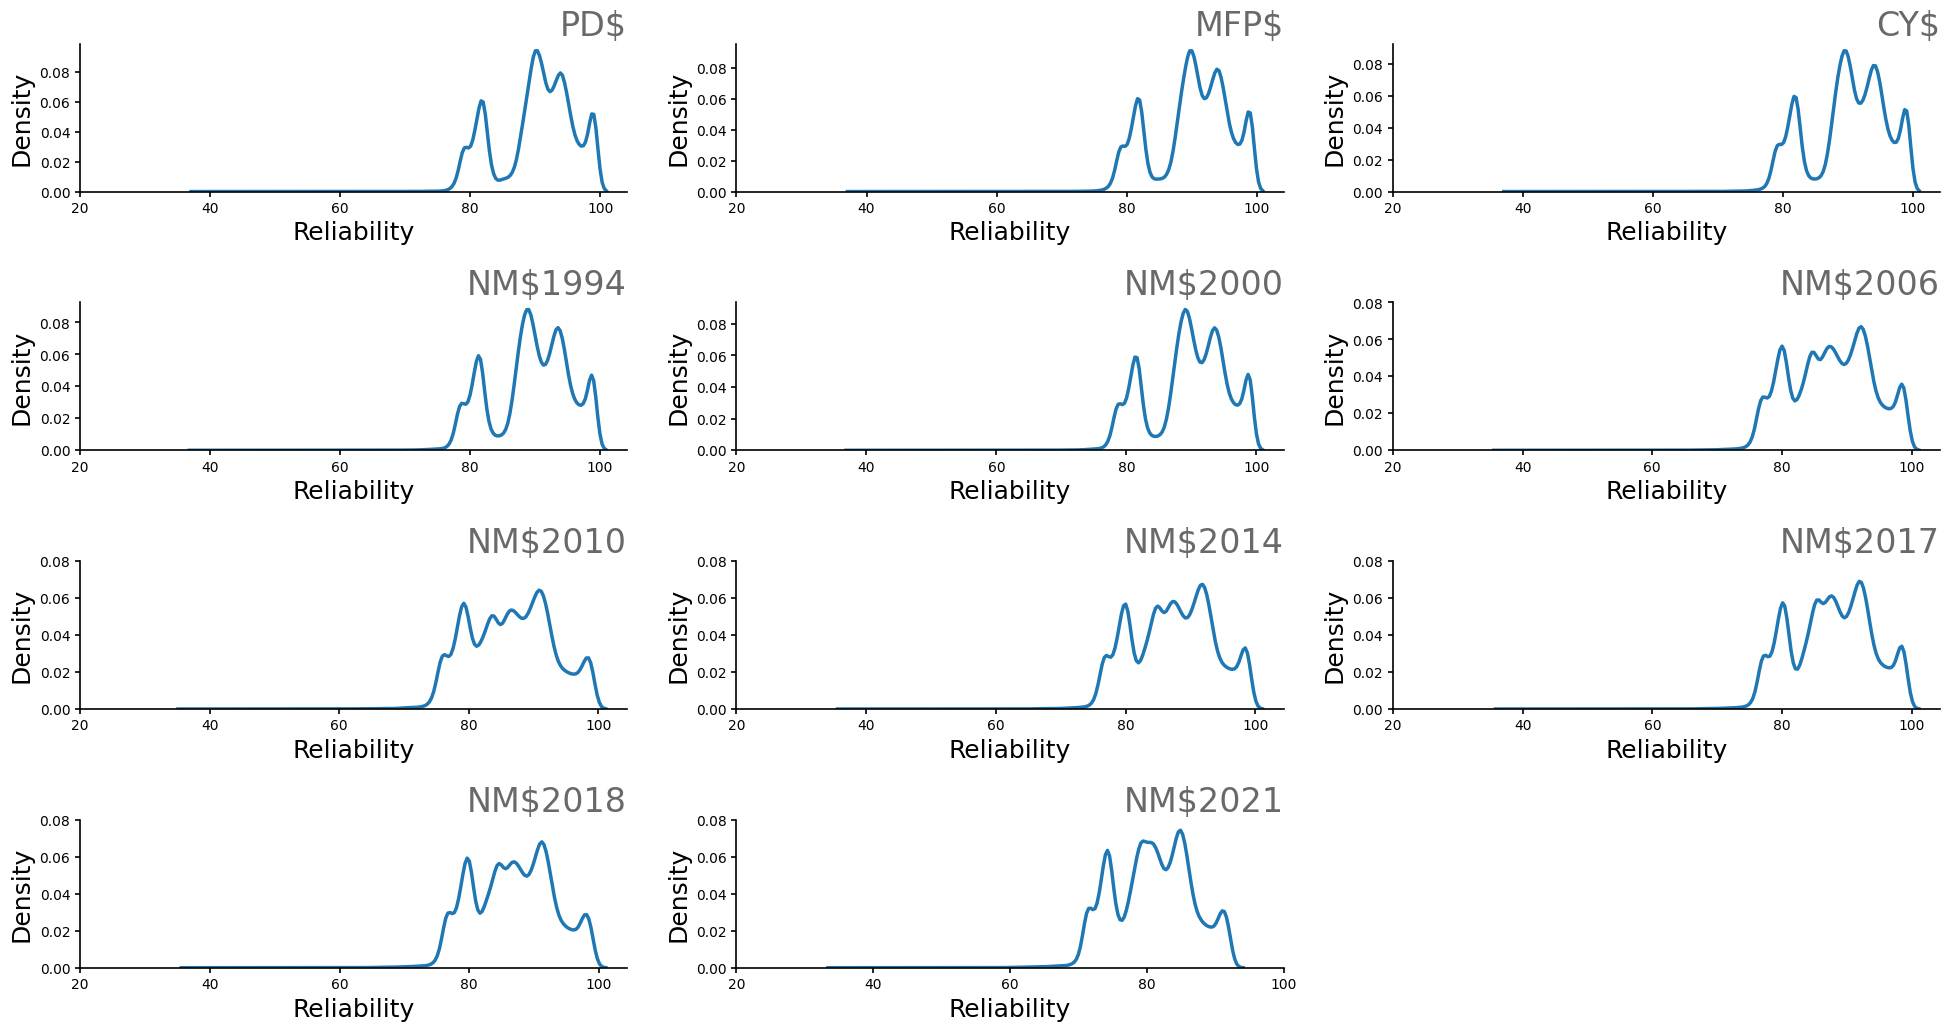

In [36]:
fig, axes = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(24,12))

my_line_width = 2.5

sns.kdeplot(ax=axes[0,0], data=all_traits_ho, x="rel_PD$", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[0,1], data=all_traits_ho, x="rel_MFP$", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[0,2], data=all_traits_ho, x="rel_CY$", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[1,0], data=all_traits_ho, x="rel_NM$1994", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[1,1], data=all_traits_ho, x="rel_NM$2000", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[1,2], data=all_traits_ho, x="rel_NM$2006", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[2,0], data=all_traits_ho, x="rel_NM$2010", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[2,1], data=all_traits_ho, x="rel_NM$2014", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[2,2], data=all_traits_ho, x="rel_NM$2017", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[3,0], data=all_traits_ho, x="rel_NM$2018", linewidth=my_line_width)
plt.ylim(0, 0.11)

sns.kdeplot(ax=axes[3,1], data=all_traits_ho, x="rel_NM$2021", linewidth=my_line_width)
plt.ylim(0, 0.11)

labels = ['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006',
          'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021', '']

for x in range(0,4):
    for y in range(0,3):
        # Hide the top and right borders
        axes[x,y].spines['top'].set_visible(False)
        axes[x,y].spines['right'].set_visible(False)
        # Specify what tick mark values to use
        axes[x,y].set_xticks([20, 40, 60, 80, 100])
        axes[x,y].set_yticks([0.00, 0.02, 0.04, 0.06, 0.08])
        # Label the plot
        axes[x,y].set_xlabel('Reliability', fontsize=18)
        axes[x,y].set_ylabel('Density', fontsize=18)
        axes[x,y].set_title(labels[(3*x)+y], loc='right', fontsize=24, color='dimgray')
        # Increase the width of the x- and y-axes and the accompanying tick marks
        my_axis_width = 1.2
        axes[x,y].spines['left'].set_linewidth(my_axis_width)
        axes[x,y].spines['bottom'].set_linewidth(my_axis_width)
        axes[x,y].tick_params(width=my_axis_width)

# Hide the empty figures
#axes[3,0].set_visible(False)
axes[3,2].set_visible(False)

# Increase the vertical padding between the subplots
plt.subplots_adjust(hspace=0.75)

plt.savefig('reliability_of_all_indices.png', dpi=600, transparent=True, bbox_inches='tight')

In [37]:
# Save the dataset with the reliabilities because they're very slow to calculate
all_traits_ho.to_pickle('PTA/all_traits_ho_with_rels.pkl')

In [38]:
all_traits_ho['net_merit_pct'].unique()

array(['02', '09', '08', '07', '05', '10', '11', '06', '03', '04', '01',
       '12', '18', '13', '16', '15', '29', '14', '19', '27', '17', '33',
       '38', '31', '26', '46', '28', '49', '48', '36', '68', '51', '52',
       '25', '39', '89', '63', '74', '22', '35', '75', '60', '86', '93',
       '77', '45', '98', '53', '37', '24', '21', '23', '20', '34', '40',
       '65', '70', '55', '90', '84', '59', '82', '72', '64', '97', '99',
       '85', '95', '80', '92', '88', '87', '96', '94', '42', '58', '41',
       '44', '56', '32', '78', '30', '50', '91', '79', '61', '43', '69',
       '54', '47', '62', '71', '81', '76', '83', '67', '66', '57', '73',
       '00', '0'], dtype=object)

Make Heatmaps from Correlations Among Index Values
====

In [39]:
# Correlations among all data
indices = all_traits_ho[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
idx_corrs = indices.corr(method='spearman')
# Animals born 1950-1959
indices50 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices50 = indices50[(indices50['birth_year']>=1950) & (indices50['birth_year']<1960)]
idx_corrs_50 = indices50[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 1960-1969
indices60 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices60 = indices60[(indices60['birth_year']>=1960) & (indices60['birth_year']<1970)]
idx_corrs_60 = indices60[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 1970-1979
indices70 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices70 = indices70[(indices70['birth_year']>=1970) & (indices70['birth_year']<1980)]
idx_corrs_70 = indices70[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 1980-1989
indices80 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices80 = indices80[(indices80['birth_year']>=1980) & (indices80['birth_year']<1990)]
idx_corrs_80 = indices80[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 1990-1999
indices90 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices90 = indices90[(indices90['birth_year']>=1990) & (indices90['birth_year']<2000)]
idx_corrs_90 = indices90[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 2000-2009
indices00 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices00 = indices00[(indices00['birth_year']>=2000) & (indices00['birth_year']<2010)]
idx_corrs_00 = indices00[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 2010-2019
indices10 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices10 = indices10[(indices10['birth_year']>=2010) & (indices10['birth_year']<2020)]
idx_corrs_10 = indices10[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Animals born 2020 and later
indices20 = all_traits_ho[['birth_year', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']]
indices20 = indices20[indices20['birth_year']>=2020]
idx_corrs_20 = indices20[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')

# Group into quartiles by Net Merit percentile
all_traits_ho['net_merit_quartile'] = '1st'
all_traits_ho['net_merit_quartile'] = np.where(all_traits_ho['net_merit_pct'].astype(float) < 25., '1st', all_traits_ho['net_merit_quartile'])
all_traits_ho['net_merit_quartile'] = np.where((all_traits_ho['net_merit_pct'].astype(float) >= 25.) \
                                              & (all_traits_ho['net_merit_pct'].astype(float) < 50.), '2nd', all_traits_ho['net_merit_quartile'])
all_traits_ho['net_merit_quartile'] = np.where((all_traits_ho['net_merit_pct'].astype(float) >= 50.) \
                                              & (all_traits_ho['net_merit_pct'].astype(float) < 75.), '3rd', all_traits_ho['net_merit_quartile'])
all_traits_ho['net_merit_quartile'] = np.where(all_traits_ho['net_merit_pct'].astype(float) >= 75., '4th', all_traits_ho['net_merit_quartile'])

# Bottom quartile
indices1st = all_traits_ho[['birth_year', 'net_merit_quartile', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017',
                            'NM$2018', 'NM$2021']]
indices1st = indices1st[indices1st['net_merit_quartile']=='1st']
idx_corrs_1st = indices1st[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')
# Top quartile
indices4th = all_traits_ho[['birth_year', 'net_merit_quartile', 'PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017',
                            'NM$2018', 'NM$2021']]
indices4th = indices4th[indices4th['net_merit_quartile']=='4th']
idx_corrs_4th = indices4th[['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']].corr(method='spearman')

In [40]:
all_traits_ho['net_merit_quartile'].unique()

array(['1st', '2nd', '3rd', '4th'], dtype=object)

In [41]:
# Use for scaling color bars the same way in all plots.
vmin = min(idx_corrs.values.min(),
           idx_corrs_50.values.min(),
           idx_corrs_60.values.min(),
           idx_corrs_70.values.min(),
           idx_corrs_80.values.min(),
           idx_corrs_90.values.min(),
           idx_corrs_00.values.min(),
           idx_corrs_10.values.min(),
           idx_corrs_20.values.min(),
           idx_corrs_1st.values.min(),
           idx_corrs_4th.values.min(),
          )
vmax = max(idx_corrs.values.max(),
           idx_corrs_50.values.max(),
           idx_corrs_60.values.max(),
           idx_corrs_70.values.max(),
           idx_corrs_80.values.max(),
           idx_corrs_90.values.max(),
           idx_corrs_00.values.max(),
           idx_corrs_10.values.max(),
           idx_corrs_20.values.max(),
           idx_corrs_1st.values.max(),
           idx_corrs_4th.values.max(),          
          )
cmap = sns.diverging_palette(240+vmin, 240+vmax, as_cmap=True)
print(vmin)
print(vmax)

0.4070175438596491
1.0


In [42]:
# use for filling-in supplemental table.
print(idx_corrs)

              PD$      MFP$       CY$   NM$1994   NM$2000   NM$2006   NM$2010  \
PD$      1.000000  0.984369  0.971935  0.956674  0.945687  0.905457  0.887958   
MFP$     0.984369  1.000000  0.995761  0.974543  0.964323  0.931218  0.914114   
CY$      0.971935  0.995761  1.000000  0.971653  0.959735  0.933055  0.916920   
NM$1994  0.956674  0.974543  0.971653  1.000000  0.993896  0.984004  0.975566   
NM$2000  0.945687  0.964323  0.959735  0.993896  1.000000  0.987319  0.979411   
NM$2006  0.905457  0.931218  0.933055  0.984004  0.987319  1.000000  0.998646   
NM$2010  0.887958  0.914114  0.916920  0.975566  0.979411  0.998646  1.000000   
NM$2014  0.924997  0.950478  0.952409  0.991151  0.993651  0.997668  0.993408   
NM$2017  0.920241  0.946895  0.950660  0.989473  0.990049  0.996711  0.993289   
NM$2018  0.924495  0.951654  0.956823  0.989537  0.988752  0.994545  0.990327   
NM$2021  0.922052  0.946248  0.948342  0.986793  0.982069  0.988677  0.986322   

          NM$2014   NM$2017

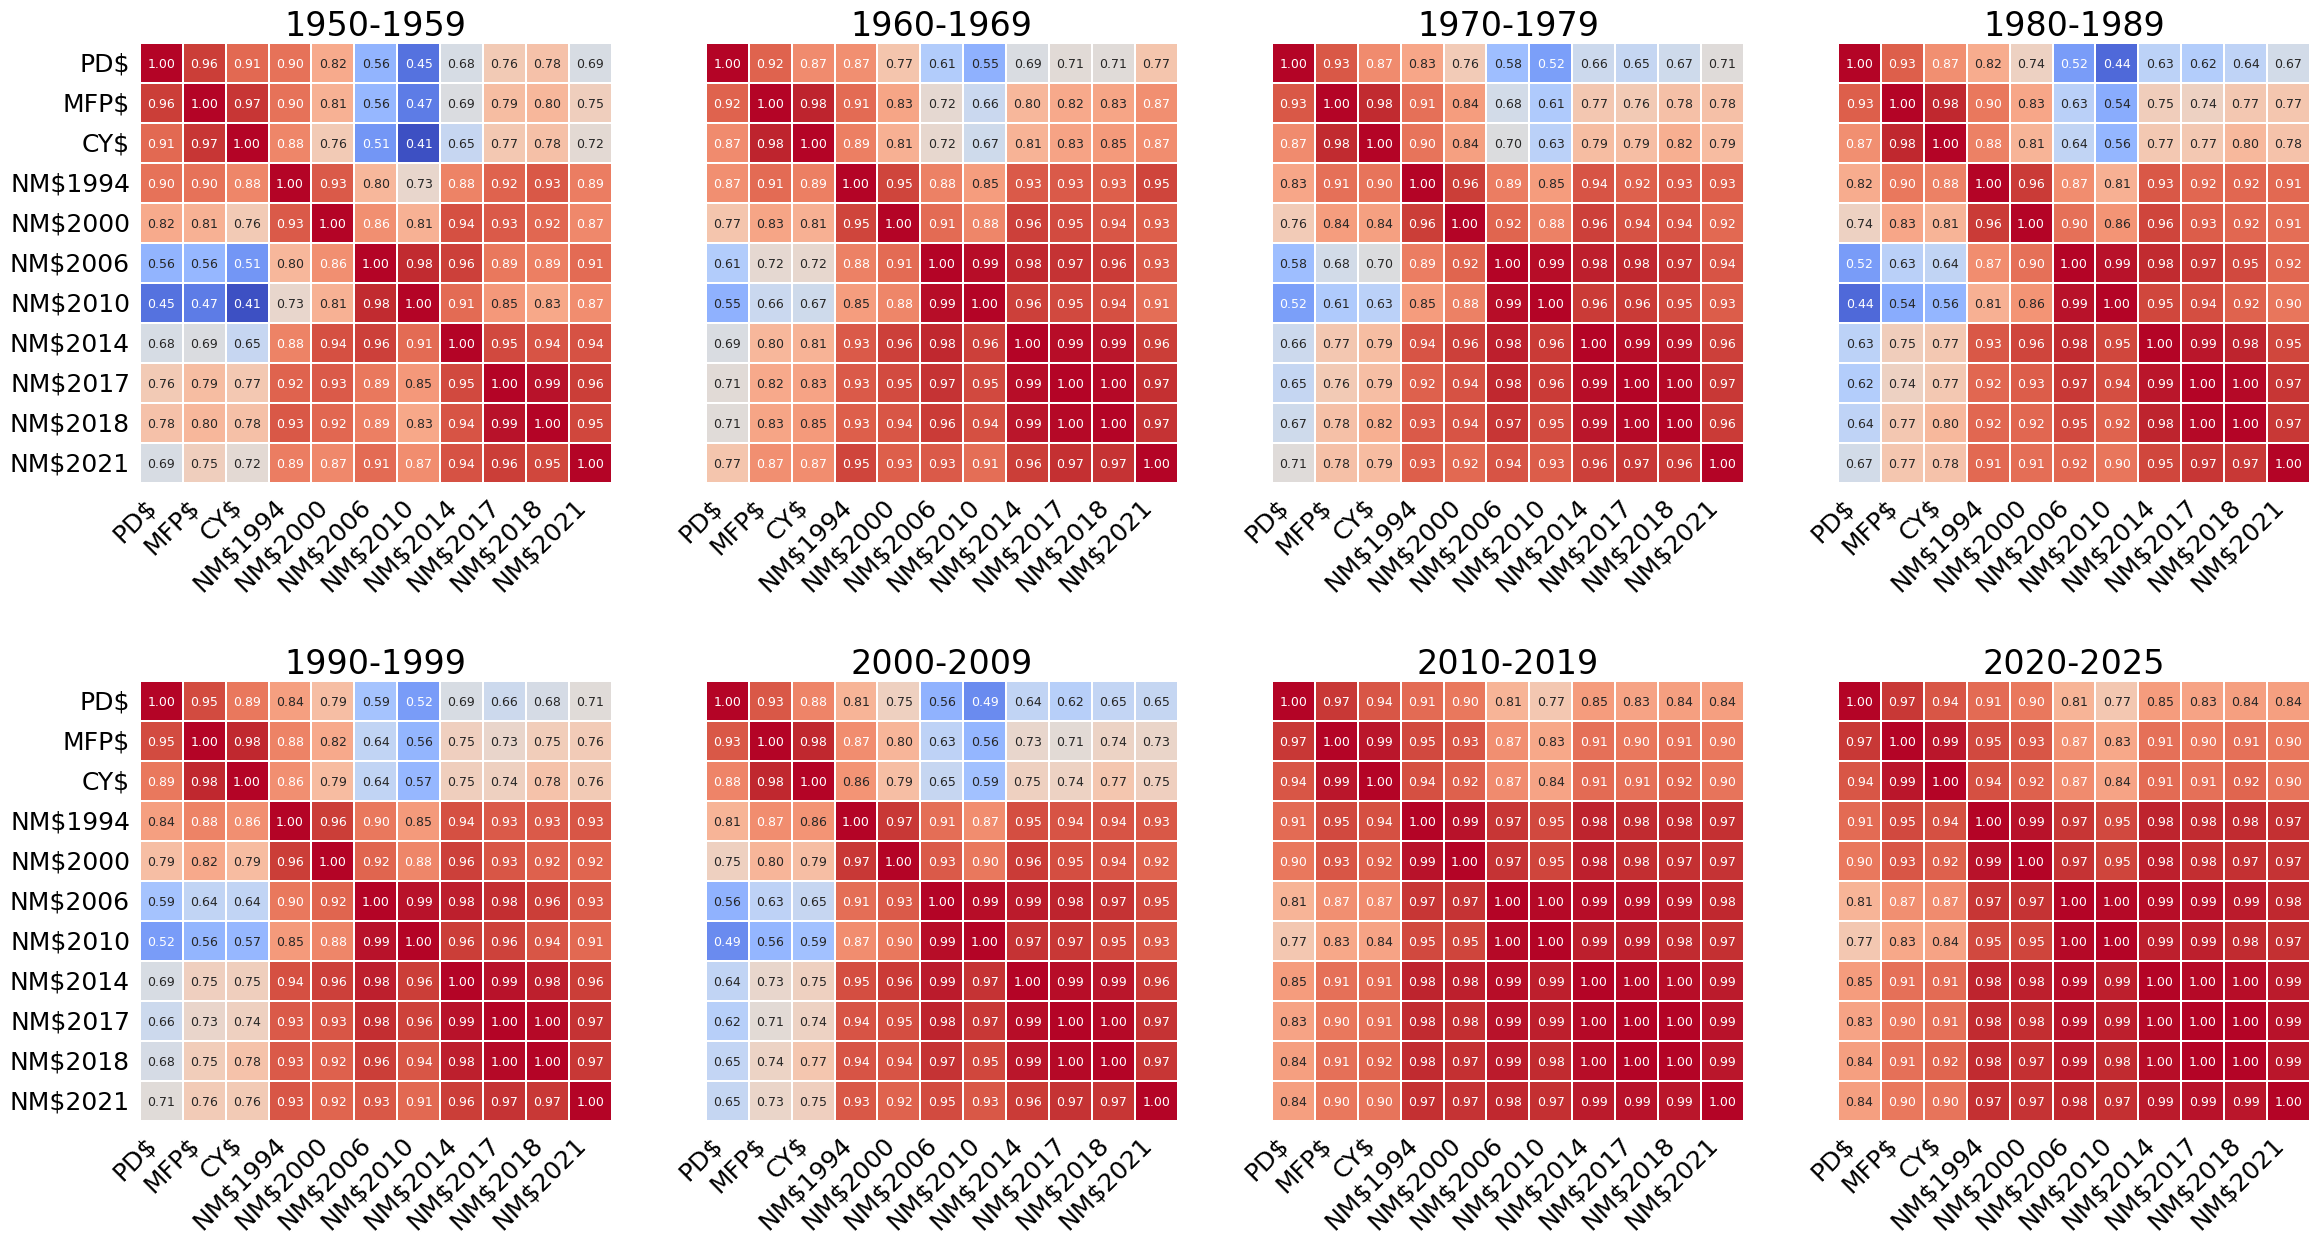

In [43]:
#fig, axs = plt.subplots(nrows=2, ncols=5, gridspec_kw=dict(width_ratios=[20, 20, 20, 20, 1]), figsize=(32,1))
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(28,14))

vmin = 0.4
vmax = 1.0
cmap = 'coolwarm'

#axs[0,0].set_title('All Birthyears')
#sns.heatmap(idx_corrs, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
#            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
#            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,0])
#axs[0,0].tick_params(left=False, bottom=False)

axs[0,0].set_title('1950-1959', fontsize=24)
sns.heatmap(idx_corrs_50, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,0])
axs[0,0].tick_params(left=False, bottom=False)

axs[0,1].set_title('1960-1969', fontsize=24)
sns.heatmap(idx_corrs_60, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,1])
axs[0,1].tick_params(left=False, bottom=False)

axs[0,2].set_title('1970-1979', fontsize=24)
sns.heatmap(idx_corrs_70, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,2])
axs[0,2].tick_params(left=False, bottom=False)

axs[0,3].set_title('1980-1989', fontsize=24)
sns.heatmap(idx_corrs_80, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,3])
axs[0,3].tick_params(left=False, bottom=False)

axs[1,0].set_title('1990-1999', fontsize=24)
sns.heatmap(idx_corrs_90, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1,0])
axs[1,0].tick_params(left=False, bottom=False)

axs[1,1].set_title('2000-2009', fontsize=24)
sns.heatmap(idx_corrs_00, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1,1])
axs[1,1].tick_params(left=False, bottom=False)

axs[1,2].set_title('2010-2019', fontsize=24)
sns.heatmap(idx_corrs_10, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1,2])
axs[1,2].tick_params(left=False, bottom=False)

axs[1,3].set_title('2020-2025', fontsize=24)
sns.heatmap(idx_corrs_10, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1,3])
axs[1,3].tick_params(left=False, bottom=False)

#axs[2,2].axis('off')

test_labels = ['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017',
               'NM$2018', 'NM$2021']
axs[0,0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,2].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,3].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,2].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,3].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,0].set_yticklabels(test_labels, fontsize=18)
#axs[0,1].set_yticklabels(test_labels, fontsize=18)
#axs[0,2].set_yticklabels(test_labels, fontsize=18)
#axs[0,3].set_yticklabels(test_labels, fontsize=18)
axs[1,0].set_yticklabels(test_labels, fontsize=18)
#axs[1,1].set_yticklabels(test_labels, fontsize=18)
#axs[1,2].set_yticklabels(test_labels, fontsize=18)
#axs[1,3].set_yticklabels(test_labels, fontsize=18)

# Increase the vertical padding between the subplots
plt.subplots_adjust(hspace=0.45)

fig.savefig('heatmap_all_indices_1950_2010.png', dpi=600, transparent=True, bbox_inches='tight')

plt.show()

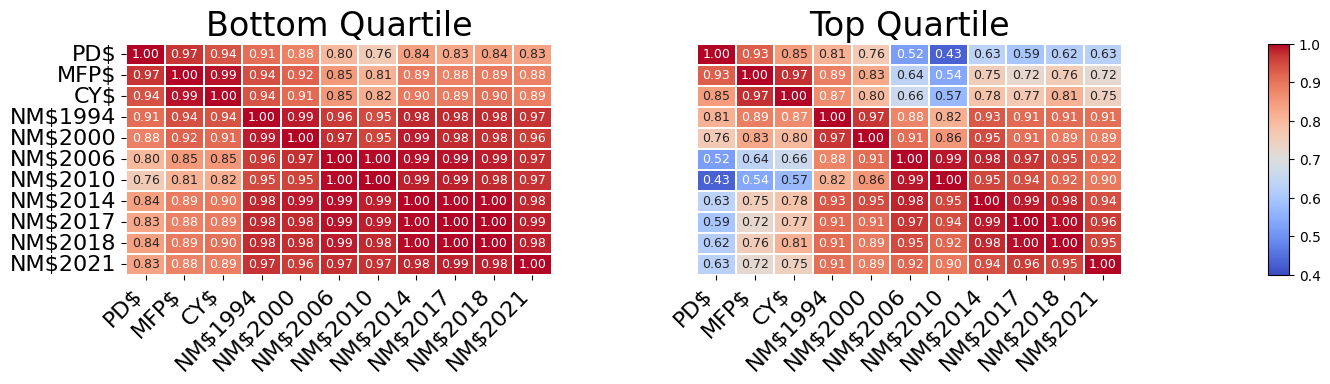

In [54]:
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[20,20,1]), figsize=(15,3))

sns.heatmap(idx_corrs_1st, linewidths=0.2, annot=True, square=False, cbar=False,
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            cmap='coolwarm', ax=axs[0], vmin=0.4, vmax=1)

sns.heatmap(idx_corrs_4th, linewidths=0.2, annot=True, square=False, cbar=False,
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            cmap='coolwarm', ax=axs[1], vmin=0.4, vmax=1)

fig.colorbar(axs[1].collections[0], cax=axs[2])

axs[0].set_title('Bottom Quartile', fontsize=24)
axs[1].set_title('Top Quartile', fontsize=24)
test_labels = ['PD$', 'MFP$', 'CY$', 'NM$1994', 'NM$2000', 'NM$2006', 'NM$2010', 'NM$2014', 'NM$2017', 'NM$2018', 'NM$2021']
axs[0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=16)
axs[1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=16)
axs[0].set_yticklabels(test_labels, fontsize=16)

# Increase the horizontal padding between the subplots
plt.subplots_adjust(wspace=0.50)

fig.savefig('heatmap_all_indices_1st_and_4th_quartile.png', dpi=600, transparent=True, bbox_inches='tight')

plt.show()

Make Heatmaps from Correlations Among Reliabilities of Index Values
====

In [46]:
# Correlations among all data
rel_indices = all_traits_ho[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                         'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_idx_corrs = rel_indices.corr(method='spearman')
# Animals born 1950-1959
rel_indices50 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices50 = rel_indices50[(rel_indices50['birth_year']>=1950) & (rel_indices50['birth_year']<1960)]
rel_idx_corrs_50 = rel_indices50[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 1960-1969
rel_indices60 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices60 = rel_indices60[(rel_indices60['birth_year']>=1960) & (rel_indices60['birth_year']<1970)]
rel_idx_corrs_60 = rel_indices60[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 1970-1979
rel_indices70 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices70 = rel_indices70[(rel_indices70['birth_year']>=1970) & (rel_indices70['birth_year']<1980)]
rel_idx_corrs_70 = rel_indices70[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 1980-1989
rel_indices80 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices80 = rel_indices80[(rel_indices80['birth_year']>=1980) & (rel_indices80['birth_year']<1990)]
rel_idx_corrs_80 = rel_indices80[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 1990-1999
rel_indices90 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices90 = rel_indices90[(rel_indices90['birth_year']>=1990) & (rel_indices90['birth_year']<2000)]
rel_idx_corrs_90 = rel_indices90[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 2000-2009
rel_indices00 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices00 = rel_indices00[(rel_indices00['birth_year']>=2000) & (rel_indices00['birth_year']<2010)]
rel_idx_corrs_00 = rel_indices00[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 2010-2019
rel_indices10 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices10 = rel_indices10[(rel_indices10['birth_year']>=2010) & (rel_indices10['birth_year']<2020)]
rel_idx_corrs_10 = rel_indices10[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Animals born 2020-2025
rel_indices20 = all_traits_ho[['birth_year', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                           'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices20 = rel_indices20[rel_indices20['birth_year']>=2020]
rel_idx_corrs_20 = rel_indices20[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                          'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')

# Bottom quartile
rel_indices1st = all_traits_ho[['birth_year', 'net_merit_quartile', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                            'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices1st = rel_indices1st[rel_indices1st['net_merit_quartile']=='1st']
rel_idx_corrs_1st = rel_indices1st[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                            'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')
# Top quartile
rel_indices4th = all_traits_ho[['birth_year', 'net_merit_quartile', 'rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                            'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']]
rel_indices4th = rel_indices4th[rel_indices4th['net_merit_quartile']=='4th']
rel_idx_corrs_4th = rel_indices4th[['rel_PD$', 'rel_MFP$', 'rel_CY$', 'rel_NM$1994', 'rel_NM$2000', 'rel_NM$2006',
                            'rel_NM$2010', 'rel_NM$2014', 'rel_NM$2017', 'rel_NM$2018', 'rel_NM$2021']].corr(method='spearman')

In [47]:
# Use for scaling color bars the same way in all plots.
vmin = min(rel_idx_corrs.values.min(),
           rel_idx_corrs_50.values.min(),
           rel_idx_corrs_60.values.min(),
           rel_idx_corrs_70.values.min(),
           rel_idx_corrs_80.values.min(),
           rel_idx_corrs_90.values.min(),
           rel_idx_corrs_00.values.min(),
           rel_idx_corrs_10.values.min(),
           rel_idx_corrs_20.values.min(),
           rel_idx_corrs_1st.values.min(),
           rel_idx_corrs_4th.values.min(),
          )
vmax = max(idx_corrs.values.max(),
           rel_idx_corrs_50.values.max(),
           rel_idx_corrs_60.values.max(),
           rel_idx_corrs_70.values.max(),
           rel_idx_corrs_80.values.max(),
           rel_idx_corrs_90.values.max(),
           rel_idx_corrs_00.values.max(),
           rel_idx_corrs_10.values.max(),
           rel_idx_corrs_20.values.max(),
           rel_idx_corrs_1st.values.max(),
           rel_idx_corrs_4th.values.max(),          
          )
cmap = sns.diverging_palette(95+vmin, 95+vmax, as_cmap=True)
print(vmin)
print(vmax)

vmin = 0.4
vmax = 1.0
cmap = 'coolwarm'

0.33081088407306664
1.0


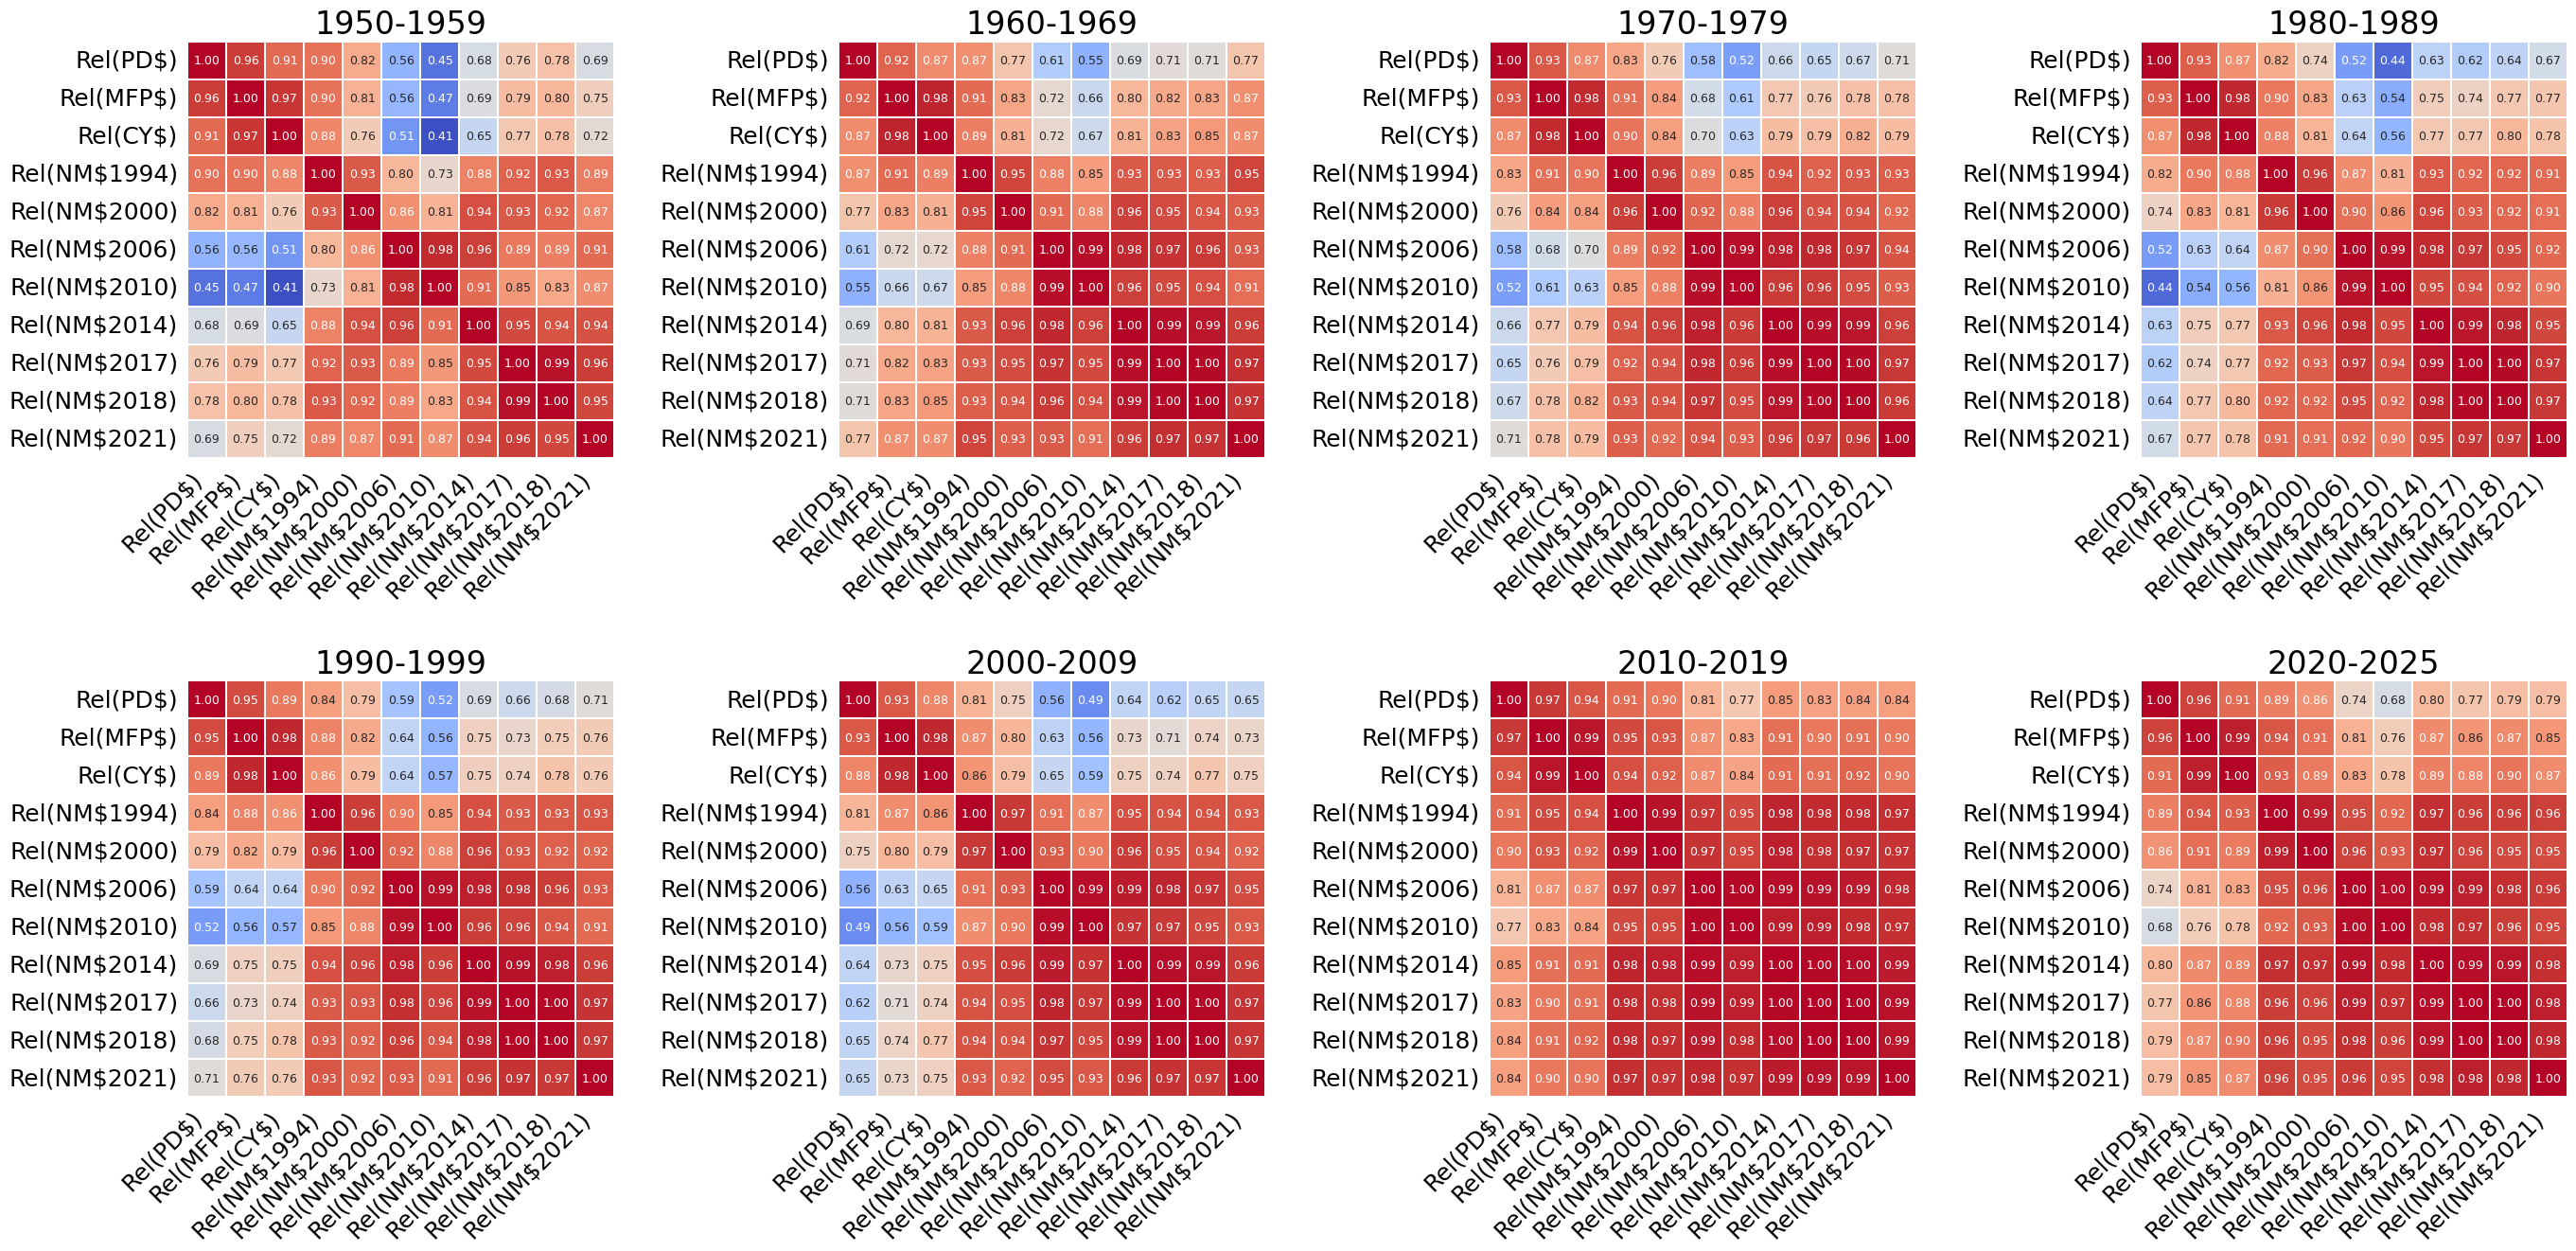

In [48]:
#fig, axs = plt.subplots(nrows=2, ncols=5, gridspec_kw=dict(width_ratios=[20, 20, 20, 20, 1]), figsize=(32,1))
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(28,14))

#axs[0,0].set_title('All Birthyears')
#sns.heatmap(idx_corrs, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
#            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
#            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,0])
#axs[0,0].tick_params(left=False, bottom=False)

axs[0,0].set_title('1950-1959', fontsize=24)
sns.heatmap(idx_corrs_50, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,0])
axs[0,0].tick_params(left=False, bottom=False)

axs[0,1].set_title('1960-1969', fontsize=24)
sns.heatmap(idx_corrs_60, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,1])
axs[0,1].tick_params(left=False, bottom=False)

axs[0,2].set_title('1970-1979', fontsize=24)
sns.heatmap(idx_corrs_70, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,2])
axs[0,2].tick_params(left=False, bottom=False)

axs[0,3].set_title('1980-1989', fontsize=24)
sns.heatmap(idx_corrs_80, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0,3])
axs[0,3].tick_params(left=False, bottom=False)

axs[1,0].set_title('1990-1999', fontsize=24)
sns.heatmap(idx_corrs_90, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1,0])
axs[1,0].tick_params(left=False, bottom=False)

axs[1,1].set_title('2000-2009', fontsize=24)
sns.heatmap(idx_corrs_00, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=0.4, vmax=1.0, cmap='coolwarm', ax=axs[1,1])
axs[1,1].tick_params(left=False, bottom=False)

axs[1,2].set_title('2010-2019', fontsize=24)
sns.heatmap(idx_corrs_10, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=0.4, vmax=1.0, cmap='coolwarm', ax=axs[1,2])
axs[1,2].tick_params(left=False, bottom=False)

axs[1,3].set_title('2020-2025', fontsize=24)
sns.heatmap(idx_corrs_20, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=0.4, vmax=1.0, cmap='coolwarm', ax=axs[1,3])
axs[1,3].tick_params(left=False, bottom=False)

#axs[2, 2].axis('off')

test_labels = ['Rel(PD$)', 'Rel(MFP$)', 'Rel(CY$)', 'Rel(NM$1994)', 'Rel(NM$2000)',
               'Rel(NM$2006)', 'Rel(NM$2010)', 'Rel(NM$2014)', 'Rel(NM$2017)',
               'Rel(NM$2018)', 'Rel(NM$2021)']
axs[0,0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,2].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,3].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,2].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1,3].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0,0].set_yticklabels(test_labels, fontsize=18)
axs[0,1].set_yticklabels(test_labels, fontsize=18)
axs[0,2].set_yticklabels(test_labels, fontsize=18)
axs[0,3].set_yticklabels(test_labels, fontsize=18)
axs[1,0].set_yticklabels(test_labels, fontsize=18)
axs[1,1].set_yticklabels(test_labels, fontsize=18)
axs[1,2].set_yticklabels(test_labels, fontsize=18)
axs[1,3].set_yticklabels(test_labels, fontsize=18)

# Increase the vertical padding between the subplots
plt.subplots_adjust(hspace=0.50)

fig.tight_layout(pad=3.5)

fig.savefig('heatmap_all_indices_1950_2010_rels.png', dpi=600, transparent=True, bbox_inches='tight')

plt.show()

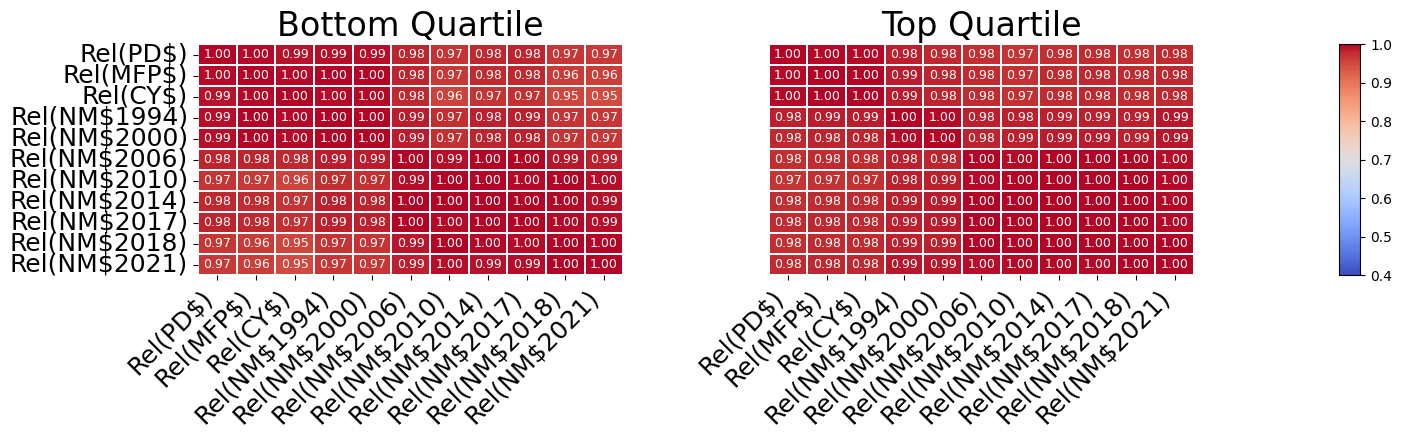

In [51]:
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[20,20,1]), figsize=(15,3))

sns.heatmap(rel_idx_corrs_1st, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=True, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[0])

sns.heatmap(rel_idx_corrs_4th, linewidths=0.2, annot=True, square=False, cbar=False, #cmap='YlGnBu',
            xticklabels=True, yticklabels=False, annot_kws={"size": 9}, fmt=".2f",
            vmin=vmin, vmax=vmax, cmap=cmap, ax=axs[1])

fig.colorbar(axs[1].collections[0], cax=axs[2])

axs[0].set_title('Bottom Quartile', fontsize=24)
axs[1].set_title('Top Quartile', fontsize=24)
test_labels = ['Rel(PD$)', 'Rel(MFP$)', 'Rel(CY$)', 'Rel(NM$1994)', 'Rel(NM$2000)',
               'Rel(NM$2006)', 'Rel(NM$2010)', 'Rel(NM$2014)', 'Rel(NM$2017)',
               'Rel(NM$2018)', 'Rel(NM$2021)']
axs[0].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[1].set_xticklabels(test_labels, rotation=45, ha="right", fontsize=18)
axs[0].set_yticklabels(test_labels, fontsize=18)
#axs[1].set_yticklabels(test_labels, fontsize=18)

# Increase the horizontal padding between the subplots
plt.subplots_adjust(wspace=0.50)

fig.savefig('heatmap_all_indices_1st_and_4th_quartile_rels.png', dpi=600, transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
# Print correlations for filling in supplemental table
print(rel_idx_corrs)